![Alt text](https://imgur.com/orZWHly.png)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! 

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

- culmen_length_mm: culmen length (mm)
- culmen_depth_mm: culmen depth (mm)
- flipper_length_mm: flipper length (mm)
- body_mass_g: body mass (g)
- sex: penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are three species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**, so your task is to apply your data science skills to help them identify groups in the dataset!

In [485]:
# Import Required Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Load and examine the data set

In [486]:
penguins_df = pd.read_csv("data/penguins.csv")
penguins_df.info()
display(penguins_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


# Clean the data set

Best Practice: Always make a copy of the raw data to manipulate. 

In [487]:
penguins_clean = penguins_df.copy()

## Drop missing values

In [488]:
penguins_clean.dropna(inplace=True)
penguins_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


## Drop outliers

In [489]:
display(penguins_clean.describe())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,335.000000,335.000000,335.000000,335.000000
mean,43.988358,17.169552,214.355224,4209.179104
std,5.453430,1.971966,263.253508,803.633495
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.550000,18.700000,213.000000,4787.500000
max,59.600000,21.500000,5000.000000,6300.000000


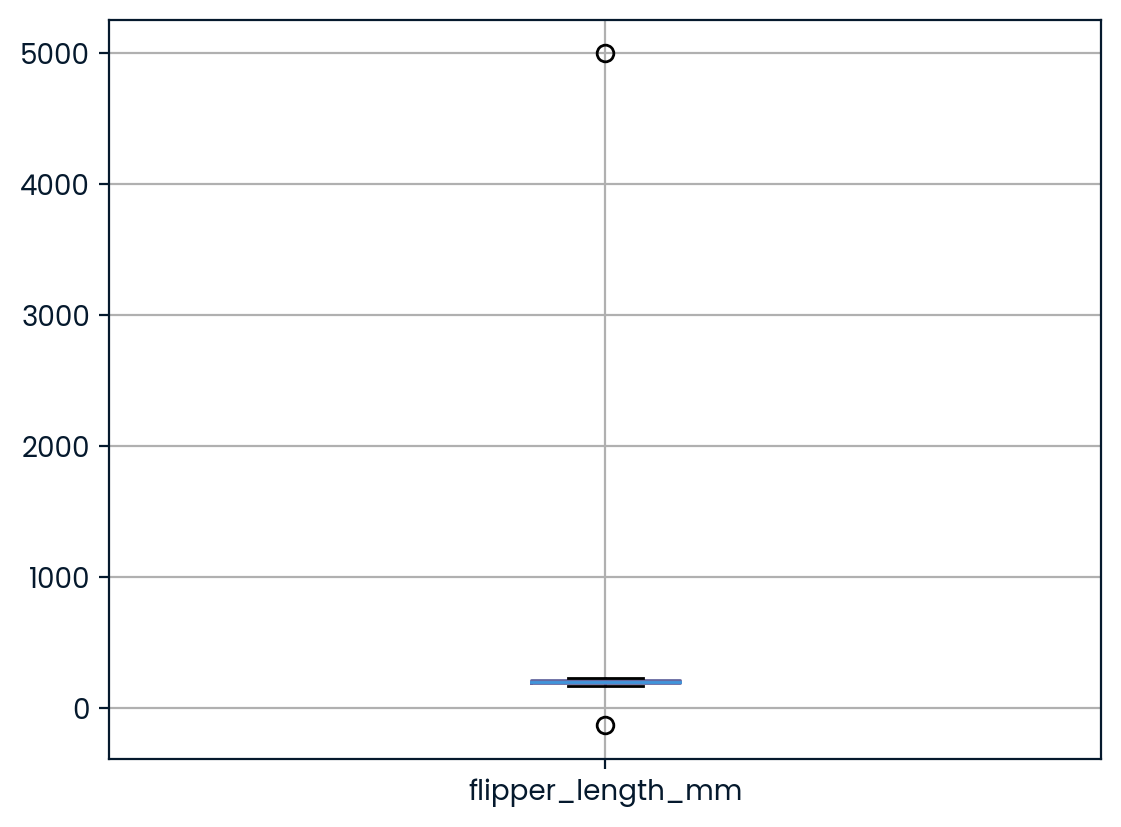

In [490]:
penguins_clean.boxplot('flipper_length_mm');

In [491]:
display(penguins_clean.head(20))

# Identify outliers
col = 'flipper_length_mm'
boxplot_df = penguins_clean.describe()
threshold_lower = boxplot_df.loc['25%'][col] - 1.5 * boxplot_df.loc['std'][col]
threshold_upper = boxplot_df.loc['75%'][col] + 1.5 * boxplot_df.loc['std'][col]
outliers_lower = penguins_df[(penguins_df[col] < threshold_lower) | (penguins_df[col] < 0)].index.tolist()
outliers_higher = penguins_df[(penguins_df[col] > threshold_upper)].index.values.tolist()
outliers = sorted(list(set(outliers_lower + outliers_higher)))

# Drop outliers
penguins_clean.drop(outliers, inplace=True)

# Examine new stats
display(penguins_clean.describe())

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
9,42.0,20.2,5000.0,4250.0,MALE
12,41.1,17.6,182.0,3200.0,FEMALE
13,38.6,21.2,191.0,3800.0,MALE


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,44.022523,17.148649,201.024024,4208.483483
std,5.444308,1.958940,14.042299,805.978992
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4800.000000
max,59.600000,21.500000,231.000000,6300.000000


# Preprocess the cleaned data

In [492]:
# Create dummy variable
penguins_dummies = (pd.get_dummies(penguins_clean)
                      .drop(['sex_.'], axis=1))
penguins_dummies

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


In [493]:
# Scale using standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(penguins_dummies)
penguins_preprocessed = pd.DataFrame(X, columns=penguins_dummies.columns)
penguins_preprocessed

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


# Perform PCA

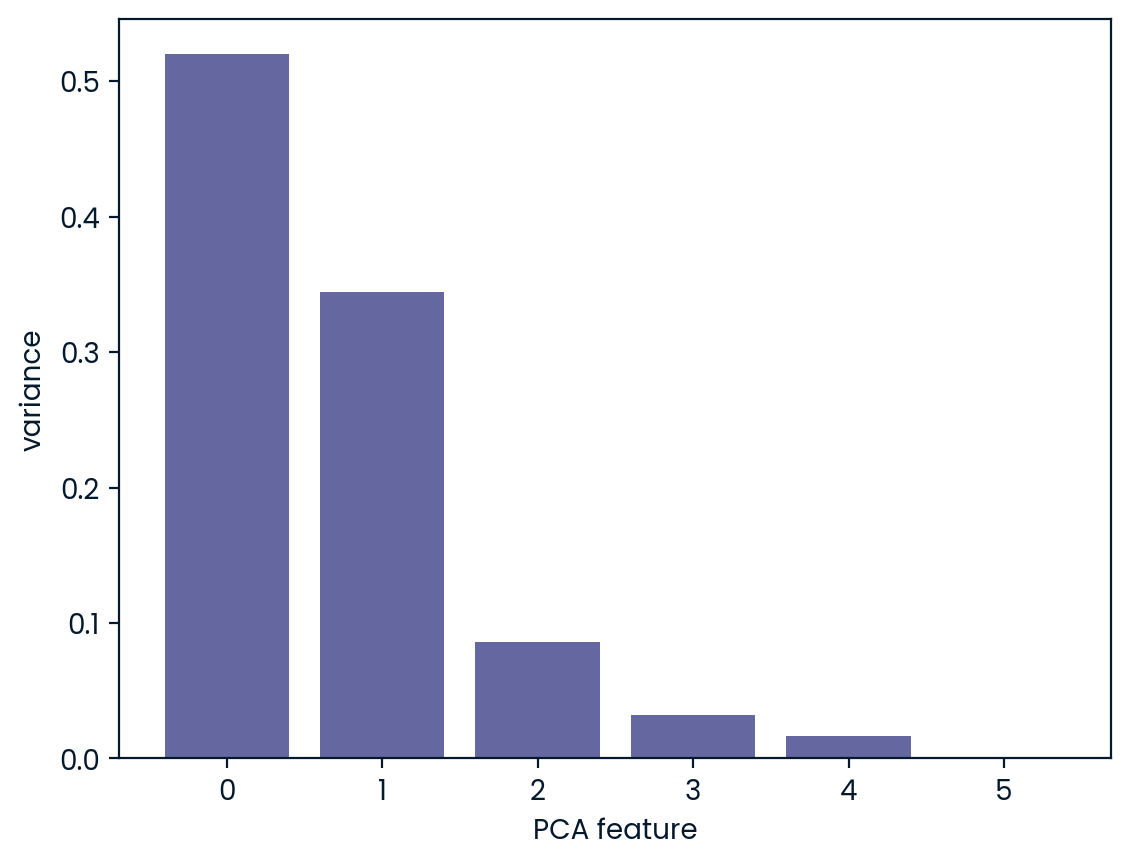

[0.51973484 0.34424041 0.08591863 0.03225427 0.01686049 0.00099136]


In [494]:
# Select features using PCA
pca = PCA()
pca.fit(penguins_preprocessed)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

print(pca.explained_variance_ratio_)

In [495]:
n_components = sum(pca.explained_variance_ratio_ > .10)
n_components

2

In [496]:
# Execute PCA
pca = PCA(n_components=n_components)
penguins_PCA = pca.fit_transform(penguins_preprocessed)

# K-Means Clustering

## Determine the number of clusters for K-Means

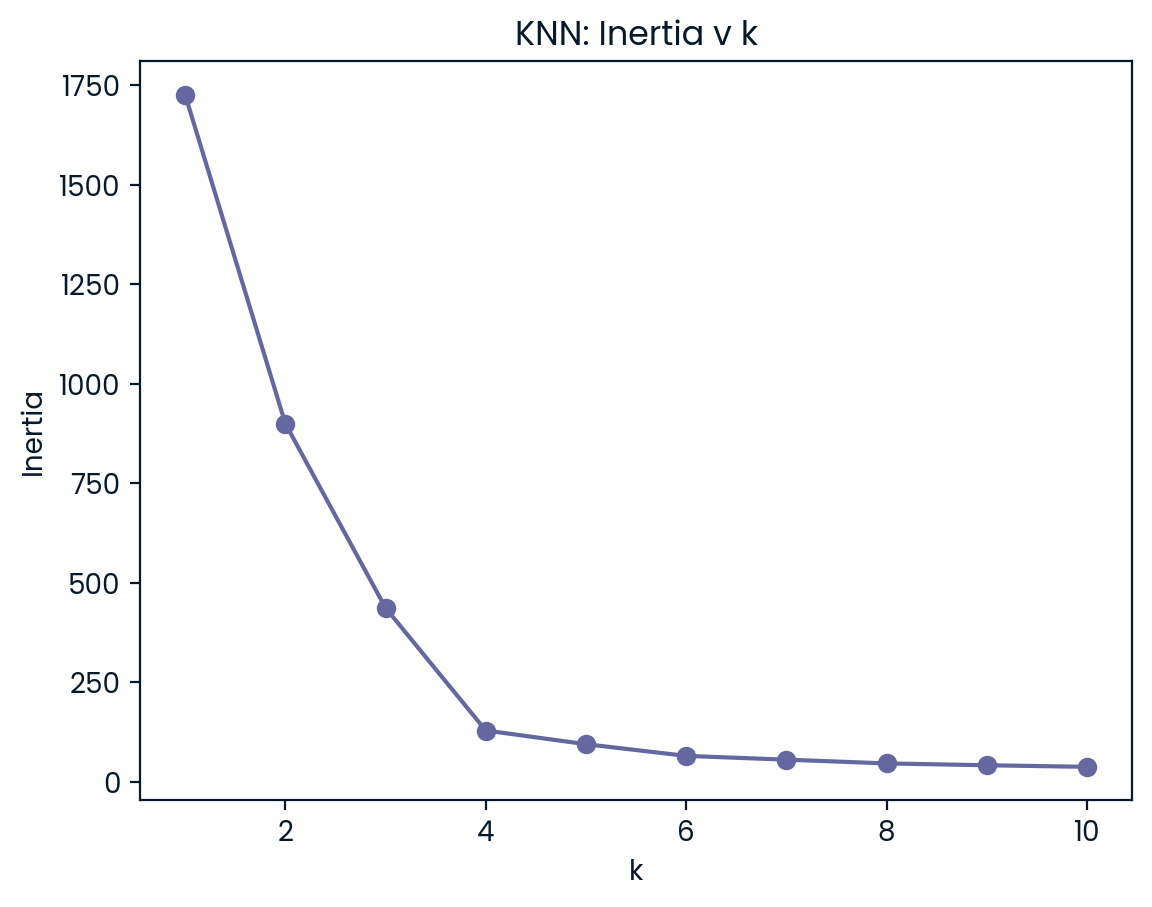

In [497]:
# Determine number of clusters
ks = list(range(1, 11))
inertias = []
for k in ks:
  model = KMeans(n_clusters=k, n_init=10, random_state=42)
  model.fit(penguins_PCA)
  inertias.append(model.inertia_)
    
plt.title("KNN: Inertia v k")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.plot(ks, inertias, '-o')
plt.show()

In [498]:
n_clusters = 4

## K-Means

In [499]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(penguins_PCA)

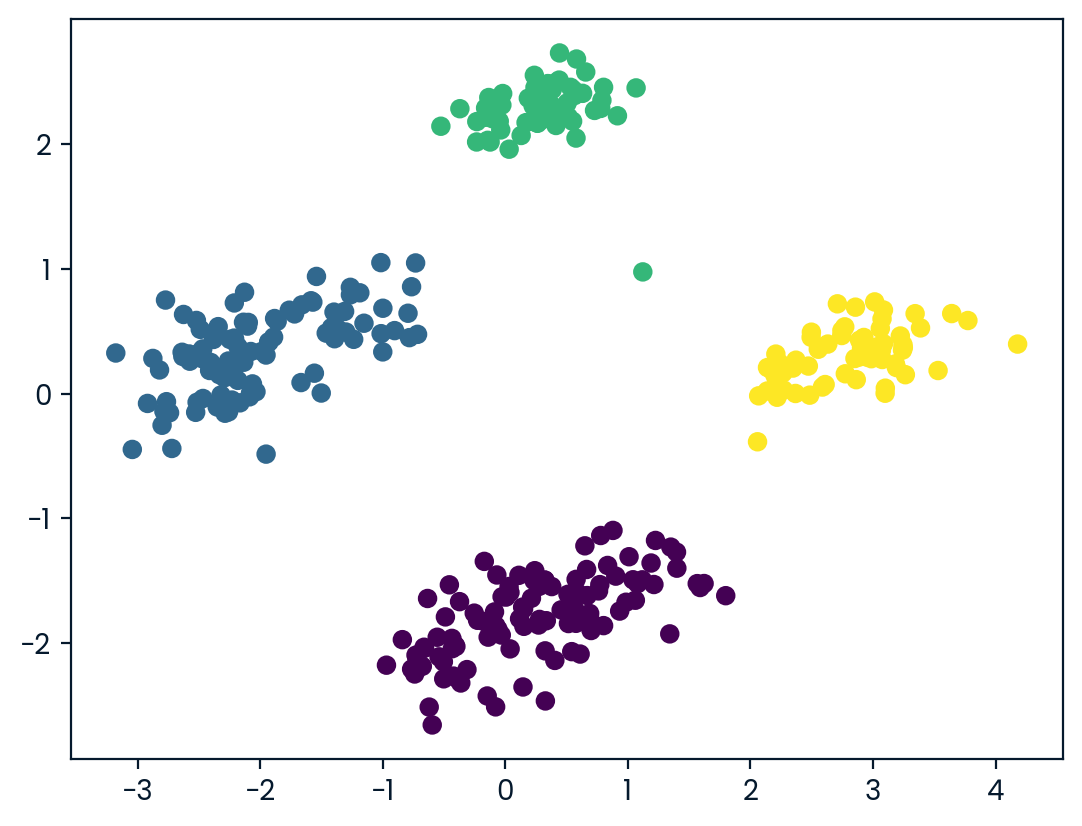

In [500]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_);

# Add label column to clean data set

In [501]:
penguins_clean['label'] = kmeans.labels_
penguins_clean

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,39.1,18.7,181.0,3750.0,MALE,0
1,39.5,17.4,186.0,3800.0,FEMALE,1
2,40.3,18.0,195.0,3250.0,FEMALE,1
4,36.7,19.3,193.0,3450.0,FEMALE,1
5,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE,2
340,46.8,14.3,215.0,4850.0,FEMALE,2
341,50.4,15.7,222.0,5750.0,MALE,3
342,45.2,14.8,212.0,5200.0,FEMALE,2


# Create a statistical table

In [502]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
stat_penguins = penguins_clean.groupby('label')[numeric_columns].mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
label,,,,
0,43.878302,19.111321,194.764151,4006.603774
1,40.217757,17.611215,189.046729,3419.158879
2,45.545763,14.262712,212.779661,4683.050847
3,49.473770,15.718033,221.540984,5484.836066


In [503]:
penguins_df.tail()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE
343,49.9,16.1,213.0,5400.0,MALE
